<a href="https://colab.research.google.com/github/psygrammer/about_python_dl_from_scrach_2/blob/main/notebooks/ch02/ch02_nlp_and_word_distributional_representation_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 자연어와 단어의 분산 표현 (solution)

* 싸이그래머 / 어바웃파이썬 : 딥러닝 NLP [1]
* 김무성

--------------

# 차례 
* 2.1 자연어처리란
  - 2.1.1 단어의 의미
* 2.2 시소러스
  - 2.2.1 WordNet
  - 2.2.2 시소러스의 문제점
* 2.3 통계 기반 기법
  - 2.3.1 파이썬으로 말뭉치 전처리하기
  - 2.3.2 단어의 분산 표현
  - 2.3.3 분포 가설
  - 2.3.4 동시발생 행렬
  - 2.3.5 벡터 간 유사도
  - 2.3.6 유사 단어의 랭킹 표시
* 2.4 통계 기반 기법 개선하기
  - 2.4.1 상호정보량
  - 2.4.2 차원 감소
  - 2.4.3 SVD에 의한 차원 감소
  - 2.4.4 PTB 데이터셋
  - 2.4.5 PTB 데이터셋 평가
* 정리

------------

In [20]:
!git clone https://github.com/psygrammer/about_python_dl_from_scrach_2.git

Cloning into 'about_python_dl_from_scrach_2'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 70 (delta 27), reused 24 (delta 4), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [21]:
ls

about_python_dl_from_scrach_2/  sample_data/


In [22]:
cd /content/about_python_dl_from_scrach_2/notebooks/ch02

/content/about_python_dl_from_scrach_2/notebooks/ch02


In [23]:
ls

ch02_nlp_and_word_distributional_representation.ipynb
ch02_nlp_and_word_distributional_representation_sol.ipynb


# 2.1 자연어처리란
* 2.1.1 단어의 의미

## 2.1.1 단어의 의미

------------

# 2.2 시소러스
* 2.2.1 WordNet
* 2.2.2 시소러스의 문제점


## 2.2.1 WordNet


## 2.2.2 시소러스의 문제점


--------------

# 2.3 통계 기반 기법
* 2.3.1 파이썬으로 말뭉치 전처리하기
* 2.3.2 단어의 분산 표현
* 2.3.3 분포 가설
* 2.3.4 동시발생 행렬
* 2.3.5 벡터 간 유사도
* 2.3.6 유사 단어의 랭킹 표시

 ## 2.3.1 파이썬으로 말뭉치 전처리하기
 

In [ ]:
text = 'You say goodbye and I say hello.'

In [ ]:
text = text.lower()
text

'you say goodbye and i say hello.'

In [ ]:
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [ ]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [ ]:
word_to_id = {}

In [ ]:
id_to_word = {}

In [ ]:
for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

In [ ]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [ ]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [ ]:
id_to_word[1]

'say'

In [ ]:
word_to_id['hello']

5

In [ ]:
import numpy as np

In [ ]:
corpus = [word_to_id[w] for w in words]
corpus

[0, 1, 2, 3, 4, 1, 5, 6]

In [ ]:
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [ ]:
# 지금까지의 처리들을 한 데 모아 하나의 함수로
def preprocess(text):
  text = text.lower()
  text = text.replace('.', ' .')
  words = text.split(' ')

  word_to_id = {}
  id_to_word = {}

  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

  
  corpus = np.array([word_to_id[w] for w in words])

  return corpus, word_to_id, id_to_word

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(word_to_id)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [ ]:
# util.py 라는 파일을 만들어서 preprocess를 해당 파일로 분리해놓고 써보자
import util

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = util.preprocess(text)
print(corpus)
print(word_to_id)
print(id_to_word)

## 2.3.2 단어의 분산 표현
 

## 2.3.3 분포 가설
 

## 2.3.4 동시발생 행렬
 

In [ ]:
import numpy as np
from util import preprocess

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [ ]:
# 동시발생 행렬 예시
C = np.array([
  [0, 1, 0, 1, 0, 0, 0],
  [0, 0, 1, 0, 1, 0, 0],
  [0, 1, 0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 1, 0],              
], dtype=np.int32)

print(type(C))
print(C)

<class 'numpy.ndarray'>
[[0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


In [ ]:
# ID가 0인 단어의 벡터 표현
print(C[0])

[0 1 0 1 0 0 0]


In [ ]:
# ID가 4인 단어의 벡터 표현
print(C[4])

[0 0 0 0 0 1 0]


In [ ]:
# 'goodbye'의 벡터 표현
print(C[word_to_id['goodbye']])

[0 1 0 1 0 0 0]


In [ ]:
# 말뭉치로부터 동시발생 행렬을 만들어주는 함수를 구현해보자.
# 그리고 util.py 파일에 함수 추가해주자.
def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size+1):
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1

  return co_matrix


In [ ]:
len(word_to_id)

7

In [ ]:
vocab_size = len(word_to_id)
co_matrix = create_co_matrix(corpus, vocab_size, window_size=1)

print(co_matrix)

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


## 2.3.5 벡터 간 유사도

In [ ]:
# 코사인 유사도 함수 만들기 (그리고 util.py 파일에 추가)
def cos_similarity(x, y):
  nx = x / np.sqrt(np.sum(x**2)) # x의 정규화
  ny = y / np.sqrt(np.sum(y**2)) # y의 정규화
  return np.dot(nx, ny)


In [ ]:
C = create_co_matrix(corpus, vocab_size)
print(C)

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


In [ ]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [ ]:
c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(c0)
print(c1)

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]


## 2.3.6 유사 단어의 랭킹 표시


In [ ]:
# 유사 단어의 랭킹 표시 함수
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
  # 검색어를 꺼낸다
  if query not in word_to_id:
    print("%s(을)를 찾을 수 없습니다." % query)
    return

  print('\n[query] ' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  # 코사인 유사도 계산
  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)

  # 코사인 유사도를 기준으로 내림차순으로 출력
  count = 0
  for i in (-1*similarity).argsort():
    if id_to_word[i] == query:
      continue
    print(' %s: %s' %(id_to_word[i], similarity[i]))

    count += 1
    if count >= top:
      return

In [ ]:
most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067811865475
 i: 0.7071067811865475
 hello: 0.7071067811865475
 say: 0.0
 and: 0.0


----------------

# 2.4 통계 기반 기법 개선하기
* 2.4.1 상호정보량
* 2.4.2 차원 감소
* 2.4.3 SVD에 의한 차원 감소
* 2.4.4 PTB 데이터셋
* 2.4.5 PTB 데이터셋 평가


## 2.4.1 상호정보량


In [31]:
import numpy as np 

def ppmi(C, verbose=False, eps=1e-8):
  M = np.zeros_like(C, dtype=np.float32)
  N = np.sum(C)
  S = np.sum(C, axis=0)
  total = C.shape[0] * C.shape[1]
  cnt = 0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i,j]* N/(S[j]*S[i]) + eps)
      M[i,j] = max(0,pmi)

      if verbose:
        cnt += 1
        if cnt % (total//100) == 0:
          print("%.1f% 완료" %(100*cnt/total))
  
  return M

In [25]:
ls ..

ch02/  common/


In [26]:
import sys
sys.path.append("..")
from common.util import preprocess, create_co_matrix, cos_similarity

In [27]:
text = 'You say goodbye and I say hello'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

In [32]:
W = ppmi(C)

In [33]:
np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0]
 [1 0 1 0 1 1]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 1 0 1 0 0]
 [0 1 0 0 0 0]]
--------------------------------------------------
PPMI
[[0.    1.585 0.    0.    0.    0.   ]
 [1.585 0.    0.585 0.    0.585 1.585]
 [0.    0.585 0.    1.585 0.    0.   ]
 [0.    0.    1.585 0.    1.585 0.   ]
 [0.    0.585 0.    1.585 0.    0.   ]
 [0.    1.585 0.    0.    0.    0.   ]]


## 2.4.2 차원 감소


## 2.4.3 SVD에 의한 차원 감소


In [34]:
import sys
sys.path.append("..")
from common.util import preprocess, create_co_matrix, ppmi

In [35]:
text = 'You say goodbye and I say hello'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

In [36]:
W = ppmi(C)

In [37]:
# SVD
U, S, V = np.linalg.svd(W)

In [38]:
U

array([[-4.524e-01,  0.000e+00,  0.000e+00, -5.435e-01,  6.545e-01,
        -2.676e-01],
       [ 0.000e+00, -7.686e-01,  6.397e-01,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-5.435e-01,  1.824e-17,  4.565e-17,  4.524e-01,  2.676e-01,
         6.545e-01],
       [-5.551e-17, -6.397e-01, -7.686e-01,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-5.435e-01,  1.824e-17,  4.565e-17,  4.524e-01, -2.676e-01,
        -6.545e-01],
       [-4.524e-01,  1.324e-17,  3.315e-17, -5.435e-01, -6.545e-01,
         2.676e-01]], dtype=float32)

In [39]:
S

array([2.693e+00, 2.693e+00, 1.866e+00, 1.866e+00, 2.792e-17, 5.603e-33],
      dtype=float32)

In [40]:
V

array([[ 1.559e-17, -7.686e-01, -4.705e-17, -6.397e-01, -4.705e-17,
         6.683e-17],
       [-4.524e-01,  0.000e+00, -5.435e-01,  0.000e+00, -5.435e-01,
        -4.524e-01],
       [ 5.435e-01,  8.327e-17, -4.524e-01,  0.000e+00, -4.524e-01,
         5.435e-01],
       [-1.489e-18, -6.397e-01,  3.380e-17,  7.686e-01, -2.171e-17,
         1.194e-17],
       [ 6.149e-17,  1.691e-16,  7.071e-01, -1.863e-16, -7.071e-01,
        -4.446e-17],
       [ 7.071e-01,  0.000e+00, -9.534e-17,  1.572e-17,  4.344e-17,
        -7.071e-01]], dtype=float32)

In [41]:
print(C[0]) # 동시발생 행렬

[0 1 0 0 0 0]


In [42]:
print(W[0]) # PPMI 행렬

[0.    1.585 0.    0.    0.    0.   ]


In [43]:
print(U[0]) # SVD

[-0.452  0.     0.    -0.543  0.654 -0.268]


In [44]:
# 2차원으로 축소시키기
print(U[0, :2])

[-0.452  0.   ]


In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

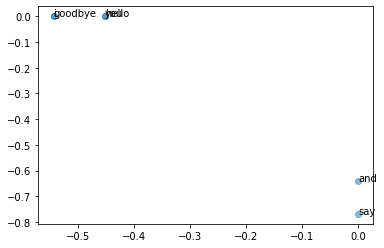

In [46]:
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

## 2.4.4 PTB 데이터셋


## 2.4.5 PTB 데이터셋 평가


---------

# 정리

------------------
# 참고문헌
* [1] 밑바닥부터 시작하는 딥러닝 2
  - https://www.hanbit.co.kr/store/books/look.php?p_code=B8950212853
  - github - https://github.com/WegraLee/deep-learning-from-scratch-2